# Linear Regression with Gradient Descent for 1 variable

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("test_data.csv",encoding="Latin-1")

In [4]:
x_values = data.iloc[:,0]
# x_values2 = data.iloc[:,1]
y_values = data.iloc[:,1]

(1.1930336441895937, -3.8957808783118533)

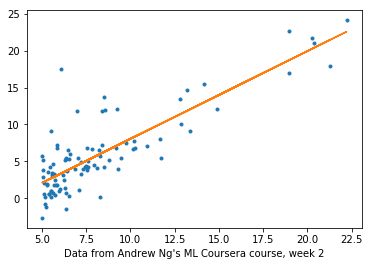

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_values, y_values, '.')
m, b = np.polyfit(x_values, y_values, 1) # Use numpy built-in linear regression. 
                                         # Which happens to also use minimum least squares

plt.plot(x_values, m*x_values + b, '-')
plt.xlabel("Data from Andrew Ng's ML Coursera course, week 2")
m, b

### Numpy.polyfit returns to us f(x) = 1.19x - 3.89

Lets see how we do using gradient descent to find a regression line.

In [9]:
def squared_error(x_values, y_values, a, b):
    yhat = (a * x_values + b)
    return np.sum((y_values - yhat) ** 2)
def deriv_wrt_a(x_values, y_values, a, b):
    errors = y_values - (a * x_values + b)
    return (1 / len(x_values)) * np.sum(-2 * errors * x_values)

def deriv_wrt_b(x_values, y_values, a, b):
    errors = y_values - (a * x_values + b)
    return (1 / len(x_values)) * np.sum(-2 * errors * 1)

LEARNING_RATE_A = 0.01
LEARNING_RATE_B = 0.1
a, b = 0.0, 0.0

std_devs = {}
# store standard deviations for each iteration of gradient descent so we can plot how well we are doing.  
# Specifically if we are minimizing the mean squared error

for epoch_idx in range(1, 301):
    da = deriv_wrt_a(x_values, y_values, a, b)
    db = deriv_wrt_b(x_values, y_values, a, b)
    
    a -= LEARNING_RATE_A * da
    b -= LEARNING_RATE_B * db
    if epoch_idx % 10 == 0:
        std_dev = np.sqrt((1 / len(x_values)) * squared_error(x_values, y_values, a, b))
        std_devs[epoch_idx] = std_dev
        print(f'E {epoch_idx:04d} | a: {a:.2f} | b: {b:.2f} | stddev {std_dev:0.2f}')
        

E 0010 | a: 0.78 | b: -0.66 | stddev 3.39
E 0020 | a: 0.94 | b: -1.54 | stddev 3.16
E 0030 | a: 1.02 | b: -2.21 | stddev 3.08
E 0040 | a: 1.07 | b: -2.69 | stddev 3.04
E 0050 | a: 1.10 | b: -3.03 | stddev 3.01
E 0060 | a: 1.13 | b: -3.28 | stddev 3.00
E 0070 | a: 1.15 | b: -3.45 | stddev 3.00
E 0080 | a: 1.16 | b: -3.58 | stddev 3.00
E 0090 | a: 1.17 | b: -3.67 | stddev 2.99
E 0100 | a: 1.18 | b: -3.73 | stddev 2.99
E 0110 | a: 1.18 | b: -3.78 | stddev 2.99
E 0120 | a: 1.18 | b: -3.81 | stddev 2.99
E 0130 | a: 1.19 | b: -3.84 | stddev 2.99
E 0140 | a: 1.19 | b: -3.85 | stddev 2.99
E 0150 | a: 1.19 | b: -3.87 | stddev 2.99
E 0160 | a: 1.19 | b: -3.87 | stddev 2.99
E 0170 | a: 1.19 | b: -3.88 | stddev 2.99
E 0180 | a: 1.19 | b: -3.88 | stddev 2.99
E 0190 | a: 1.19 | b: -3.89 | stddev 2.99
E 0200 | a: 1.19 | b: -3.89 | stddev 2.99
E 0210 | a: 1.19 | b: -3.89 | stddev 2.99
E 0220 | a: 1.19 | b: -3.89 | stddev 2.99
E 0230 | a: 1.19 | b: -3.89 | stddev 2.99
E 0240 | a: 1.19 | b: -3.89 | stdd

Text(0.5,0,'Epoch Index')

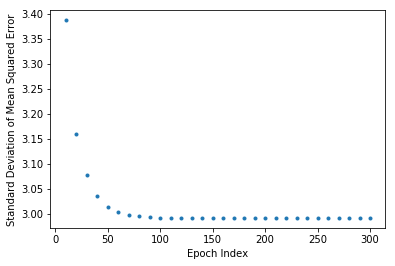

In [8]:
std_deviations = pd.Series(std_devs)
plt.plot(std_deviations, '.')
plt.ylabel('Standard Deviation of Mean Squared Error')
plt.xlabel('Epoch Index')

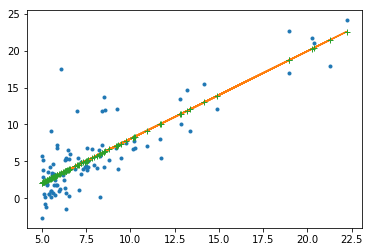

In [11]:
plt.plot(x_values, y_values, '.')
m, b = np.polyfit(x_values, y_values, 1) # Use numpy built-in linear regression. 
                                         # Which happens to also use minimum least squares

plt.plot(x_values, m*x_values + b, '-')
our_a, our_b = 1.19, -3.9

plt.plot(x_values, a*x_values + our_b, '+')

### Our guess for linear regression is shown as the green line above.  It is nearly the same as the prediction from numpy's built in polyfit' 

We can now use the Normal Equation, which uses matrix multiplication to give us an answer which minimizes mean squared error for problems with low number of features

\\[
(trans{X}X)^{-1} trans{X}y
\\]

In [19]:
x_df = data.iloc[:,0:1]
x_df.insert(loc=0, column='1', value=[1] * y_values.size)

def p_inv(df):
    return pd.DataFrame(np.linalg.pinv(df.values), df.columns, df.index)

def matrix_mult(x_df, y_values):
    x_transpose = x_df.transpose()
    return p_inv((x_transpose.dot(x_df))).dot(x_transpose).dot(y_values)

print(matrix_mult(x_df, y_values))

1   -3.895781
x    1.193034
dtype: float64


Funny enough, the normal equation gives us exactly the same answer as numpy polyfit.  I wonder what numpy is using under the hood...